In [2]:


import csv
import math
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import log_loss
from sklearn.linear_model import SGDClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, log_loss

from sklearn.svm import SVC
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import cross_val_score

import pickle

labels=[]
data_points=[]
with open('dataset.csv', mode='r') as file:
    csv_reader = csv.reader(file)
    head_bool=True
    for i in csv_reader:
        if head_bool==True:
            labels.append(i)
            head_bool=False        
        else:
            data_points.append(i)
labels=labels[0]
print(len(labels))

avoid_indexes_initial=[0]

52


Total Count    : 81713
Positive Count : 7915
Negative Count : 73798


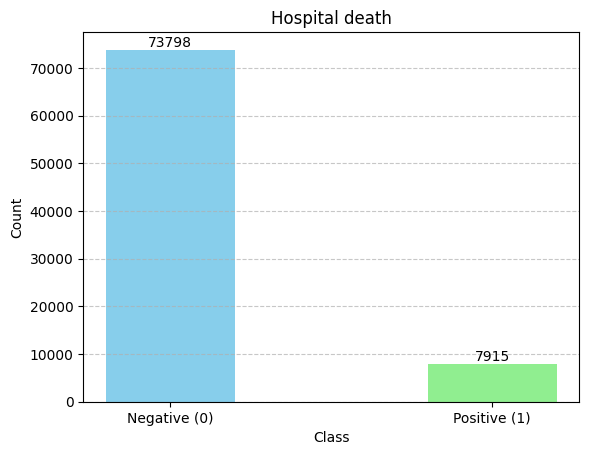

In [3]:
# Plotting positive and negative Target Class

positive_count=0
negative_count=0

for i in data_points:
    if i[-1]=='0':
        negative_count=negative_count+1
    elif i[-1]=='1':
        positive_count=positive_count+1

categories = ['Negative (0)', 'Positive (1)']
counts = [negative_count, positive_count]

print('Total Count    :',positive_count+negative_count)
print('Positive Count :',positive_count)
print('Negative Count :',negative_count)



plt.bar(categories, counts, color=['skyblue', 'lightgreen'],width=0.4)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title('Hospital death')
plt.xlabel('Class')
plt.ylabel('Count')

for index, value in enumerate(counts):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

plt.show()

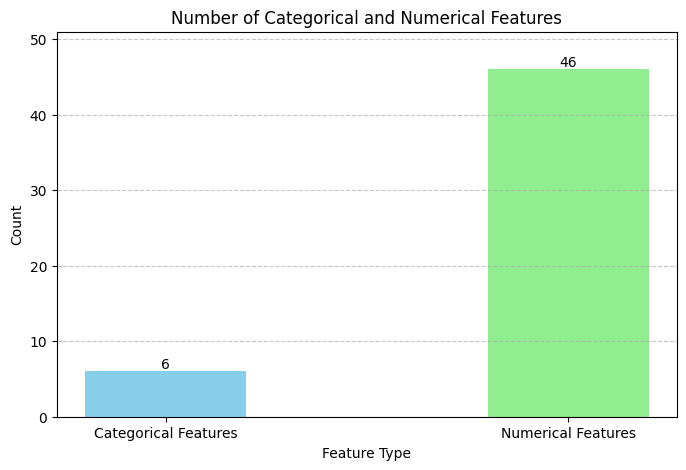

In [4]:
# Categorical Data And Numerical Data

categorical_labels = {}
categorical_count = {}
for i in range(0, len(labels)):
    if not data_points[0][i].replace('.', '', 1).isdigit():  
        categorical_labels[labels[i]]=[]
        categorical_count[labels[i]]=[]

for i in categorical_labels.keys():
    ind=labels.index(i)
    for j in data_points:
        for k in range(0,len(j)):
            if(k==ind):
                if(j[k] not in categorical_labels[i]):
                    categorical_labels[i].append(j[k])
                    categorical_count[i].append(0)
                else:
                    ind_c=categorical_labels[i].index(j[k])
                    categorical_count[i][ind_c]=categorical_count[i][ind_c]+1


total_data=len(labels)
no_of_categorical_data=len(categorical_labels.keys())
no_of_numerical_data=total_data-no_of_categorical_data

categories = ['Categorical Features', 'Numerical Features']
values = [no_of_categorical_data, no_of_numerical_data]

plt.figure(figsize=(8, 5))
bars = plt.bar(categories, values, color=['skyblue', 'lightgreen'],width=0.4)
plt.title('Number of Categorical and Numerical Features')
plt.ylabel('Count')
plt.xlabel('Feature Type')
plt.ylim(0, max(values) + 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height() 
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), 
             ha='center', va='bottom', fontsize=10)
plt.show()


Categorical Labels
0 : gender ['M', 'F', '']
1 : icu_admit_source ['Floor', 'Accident & Emergency', 'Operating Room / Recovery', 'Other Hospital', 'Other ICU', '']
2 : icu_stay_type ['admit', 'readmit', 'transfer']
3 : icu_type ['CTICU', 'Med-Surg ICU', 'CCU-CTICU', 'Neuro ICU', 'MICU', 'SICU', 'Cardiac ICU', 'CSICU']
4 : Systemic_Disease_3j ['Sepsis', 'Respiratory', 'Metabolic', 'Cardiovascular', 'Trauma', 'Neurological', 'Gastrointestinal', 'Genitourinary', '', 'Hematological', 'Musculoskeletal/Skin', 'Gynecological']
5 : Systemic_Disease_2 ['Cardiovascular', 'Respiratory', 'Metabolic', 'Trauma', 'Neurologic', 'Gastrointestinal', 'Renal/Genitourinary', '', 'Undefined diagnoses', 'Haematologic', 'Undefined Diagnoses']

Categorical Count
0 : gender [44141, 37547, 22]
1 : icu_admit_source [13982, 48161, 16595, 2098, 770, 101]
2 : icu_stay_type [76829, 482, 4399]
3 : icu_type [3539, 45149, 6336, 6818, 6852, 4609, 4297, 4105]
4 : Systemic_Disease_3j [10572, 10351, 6768, 26721, 3411, 10527

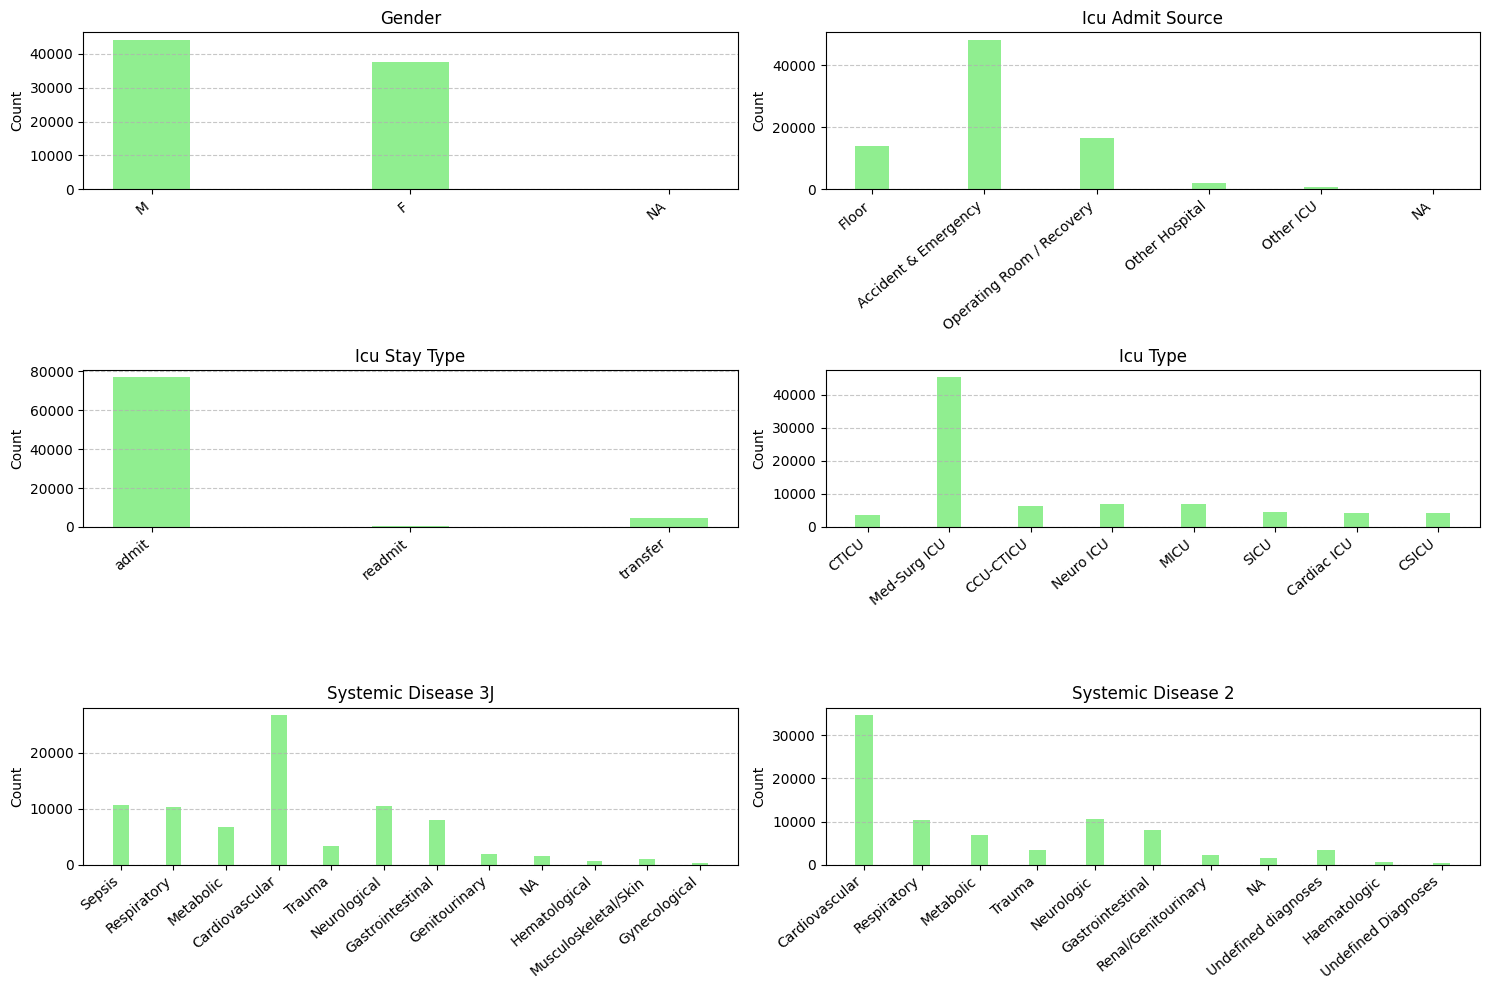

In [5]:
# Plot Numerical Data

print("Categorical Labels")
num_print=0
for i in categorical_labels.keys():
    print(num_print,":",i, categorical_labels[i])
    num_print=num_print+1

print()
print("Categorical Count")
num_print=0
for i in categorical_count.keys():
    print(num_print,":",i, categorical_count[i])
    num_print=num_print+1



nrows = (len(categorical_labels) + 1) // 2
ncols = 2  
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))

ax = ax.flatten()

for idx, (label, counts) in enumerate(zip(categorical_labels.keys(), categorical_count.values())):
    bar_positions = np.arange(len(counts))
    ax[idx].bar(bar_positions, counts, color=['lightgreen'], width=0.3)
    ax[idx].set_xticks(bar_positions)
    
    xtick_labels = ['NA' if x == '' else x for x in categorical_labels[label]]
    ax[idx].set_xticklabels(xtick_labels, rotation=40, ha='right')
    
    ax[idx].set_title(label.replace('_', ' ').title())
    ax[idx].set_ylabel('Count')
    ax[idx].grid(axis='y', linestyle='--', alpha=0.7)

for j in range(idx + 1, nrows * ncols):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

Minimum Values [1.0, 0.0, 0.0, '0', 'M', 0.0, 'Floor', 'admit', 'CTICU', -24.94722222, 0.0, 0.0, 0.0, '0', 0.0, 0.0, '0.0', 0.0, 0.0, '0.0', 0.0, 0.0, 0.0, '0.0', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '0.0', 0.0, '0.0', '0.0', '0.0', '0.0', '0.0', 'Sepsis', 'Cardiovascular', '0']
Maximum Values [131051.0, 89.0, 67.81498973, 1.0, 'M', 195.59, 'Floor', 'admit', 'CTICU', 84.36736111, 186.0, 308.0, 2201.05, 1.0, 4.0, '6.0', 1.0, 5.0, 178.0, 1.0, 200.0, 60.0, 39.7, 1.0, 143.0, 113.0, 144.0, 114.0, 164.0, 144.0, 165.0, 138.0, 163.0, 138.0, 59.0, 189.0, '100.0', 100.0, 223.0, 194.0, 223.0, 195.0, 1.0, '1.0', 1.0, 1.0, 1.0, 1.0, 1.0, 'Sepsis', 'Cardiovascular', 1.0]

First 10 Data Points
[0.19314002289202595, 0.7640449438202247, 0.3351766341113918, 0.0, 0.0, 0.9218262692366685, 0.0, 0.0, 0.0, 0.23317006853563058, 0.39731182795698927, 0.36688311688311687, 0.22807750846187044, 0.0, 0.75, 1.0, 0.0, 0.8, 0.6629213483146067, 0.0, 0.2, 0.6, 0.98992

C:\Users\samee\AppData\Local\Temp\ipykernel_15984\2756025935.py:67: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(unnormalized_data, labels=[labels[i] for i in plot_indexes],


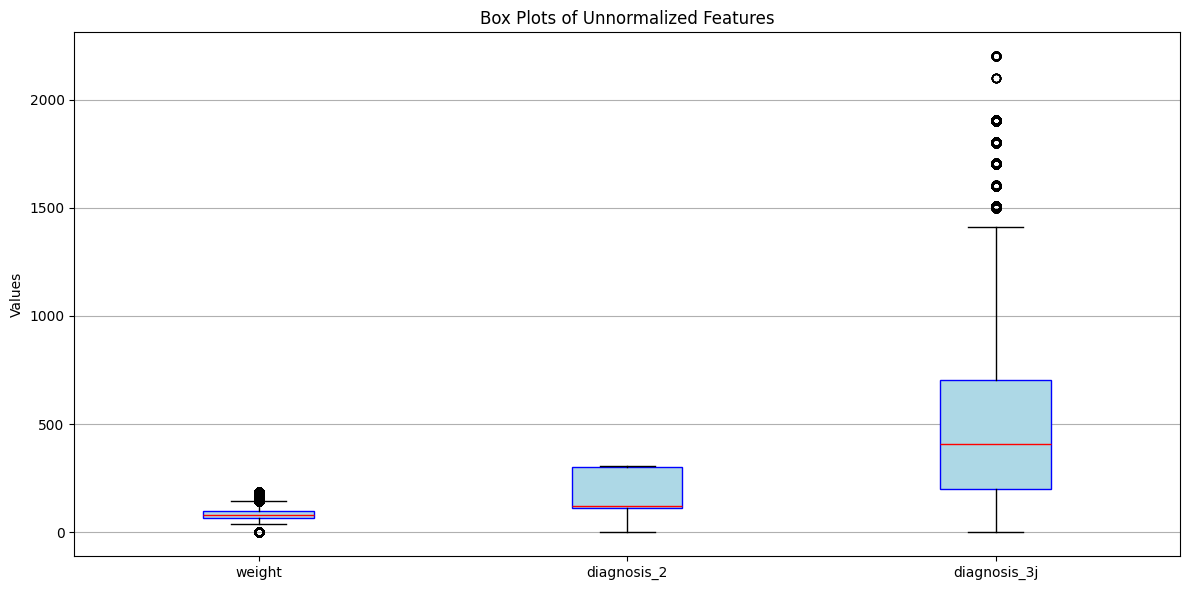

C:\Users\samee\AppData\Local\Temp\ipykernel_15984\2756025935.py:78: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(normalized_data, labels=[f'Normalized {labels[i]}' for i in plot_indexes],


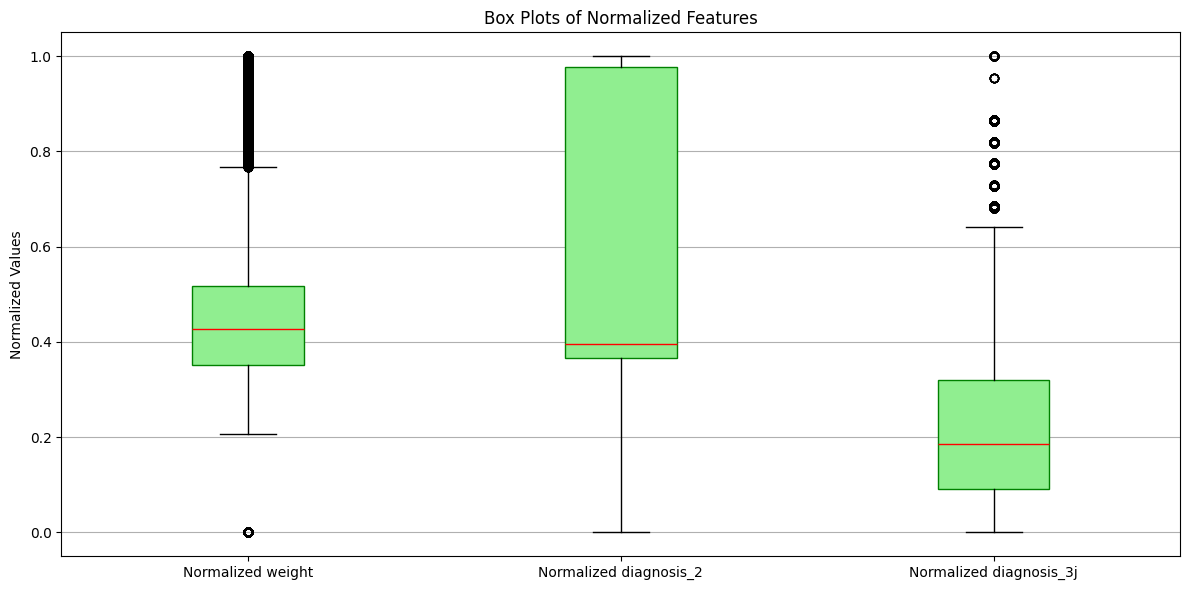

In [6]:
# Normalizing And Cleaning Numerical Data And Hot Encoding Categoricla Data

min_val=data_points[0].copy()
max_val=data_points[0].copy()

gap_val=data_points[0].copy()

normalized_data_points=[]
for i in data_points:
    for j in range(0,len(i)):
        if labels[j] not in categorical_labels.keys():
            if i[j] == '' or i[j] == ' ' or i[j] == '.':
                i[j]=0.0
            if(float(min_val[j])>float(i[j])):
                min_val[j]=float(i[j])
            if(float(max_val[j])<float(i[j])):
                max_val[j]=float(i[j])

for i in range(0,len(min_val)):
    if labels[i] not in categorical_labels.keys():
        gap_val[i]=float(max_val[i])-float(min_val[i])

for i in data_points:
    normalized_row = []
    for j in range(len(i)):
        if labels[j] not in categorical_labels.keys():
            if float(gap_val[j]) == 0.0:
                normalized_row.append(0.0)  
            else:
                normalized_value = (float(i[j]) - float(min_val[j])) / float(gap_val[j])
                normalized_row.append(normalized_value)
        else:
            normalized_row.append(float(categorical_labels[labels[j]].index(i[j])))  
    normalized_data_points.append(normalized_row)

print('Minimum Values',min_val)
print('Maximum Values',max_val)
#print(gap_val)
print()
print("First 10 Data Points")
for i in range(0,10):
    print(normalized_data_points[i])


plot_indexes = [10, 11, 12] 
unnormalized_list = []
normalized_list = []

for i in plot_indexes:
    m = []
    n = []
    for j in range(len(data_points)):
        if i < len(data_points[j]):
            if data_points[j][i] == ' ' or data_points[j][i] == '':
                m.append(0.0)  
            else:
                m.append(float(data_points[j][i]))  
            n.append(normalized_data_points[j][i])  

    unnormalized_list.append(m)
    normalized_list.append(n)

unnormalized_data = unnormalized_list
normalized_data = normalized_list

plt.figure(figsize=(12, 6))
plt.boxplot(unnormalized_data, labels=[labels[i] for i in plot_indexes],
            patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'))
plt.title('Box Plots of Unnormalized Features')
plt.ylabel('Values')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.boxplot(normalized_data, labels=[f'Normalized {labels[i]}' for i in plot_indexes],
            patch_artist=True, 
            boxprops=dict(facecolor='lightgreen', color='green'),
            medianprops=dict(color='red'))
plt.title('Box Plots of Normalized Features')
plt.ylabel('Normalized Values')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [7]:
# Calculating Variances For Feature Reduction

attribute_variance = [0.0]*len(labels)
attribute_mean = [0.0]*len(labels)


for i in normalized_data_points:
    for j in range(len(i)):
        num=float(i[j])
        attribute_mean[j]=attribute_mean[j]+num

for j in range(0,len(attribute_mean)):
    attribute_mean[j]=attribute_mean[j]/len(normalized_data_points)

print("Mean:", attribute_mean)

for i in normalized_data_points:
    for j in range(len(i)):
        attribute_variance[j]=attribute_variance[j]+(float(i[j])-attribute_mean[j])**2
for j in range(0,len(attribute_variance)):
    attribute_variance[j]=attribute_variance[j]/len(normalized_data_points)

attribute_stddev = [math.sqrt(variance) for variance in attribute_variance]

print("Variance:", attribute_variance)
print("Standard Deviation:", attribute_stddev)

"""
indices = np.arange(len(labels))
bar_width = 0.25
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(indices, attribute_mean, width=bar_width, label='Mean', color='lightblue', align='center')
ax.bar(indices + bar_width, attribute_variance, width=bar_width, label='Variance', color='lightgreen', align='center')
ax.bar(indices + 2 * bar_width, attribute_stddev, width=bar_width, label='Standard Deviation', color='salmon', align='center')
ax.set_xlabel('Attribute Index')
ax.set_ylabel('Value')
ax.set_title('Mean, Variance, and Standard Deviation of Attributes')
ax.set_xticks(indices + bar_width)
ax.set_xticklabels(indices)  
ax.legend()
plt.tight_layout()
plt.show()
"""

Mean: [0.49993447254576007, 0.6681998944785761, 0.41406606940699464, 0.18295742415527516, 0.46007367248785386, 0.8545623313520944, 1.1166521850868283, 0.11360493434337253, 2.2428866887765717, 0.23591388628776974, 0.4383470326051969, 0.5905901491459042, 0.2500603033764427, 0.2002374163229841, 0.8458537809161333, 0.8902867352808035, 0.00958231860291508, 0.7791538678055414, 0.5553417503878022, 0.15238701308237368, 0.4345313475212114, 0.42490136208442, 0.8757105851310657, 0.32699815206882626, 0.5061598418959038, 0.533496094522074, 0.4843499504362888, 0.5100535872128922, 0.5459454611067323, 0.5638987812356626, 0.5268489231897433, 0.5454712738841785, 0.5060650327920965, 0.519731485082903, 0.3659928393444297, 0.08687568704946373, 0.9353227760578209, 0.9077900701235422, 0.5737236622614528, 0.5754096466120315, 0.5487746432212772, 0.549230938679259, 0.015615630315861613, 0.2227307772325089, 0.013021183899746675, 0.02648293417204117, 0.007134727644316082, 0.004222094403583274, 0.02080452314809149

"\nindices = np.arange(len(labels))\nbar_width = 0.25\nfig, ax = plt.subplots(figsize=(12, 6))\nax.bar(indices, attribute_mean, width=bar_width, label='Mean', color='lightblue', align='center')\nax.bar(indices + bar_width, attribute_variance, width=bar_width, label='Variance', color='lightgreen', align='center')\nax.bar(indices + 2 * bar_width, attribute_stddev, width=bar_width, label='Standard Deviation', color='salmon', align='center')\nax.set_xlabel('Attribute Index')\nax.set_ylabel('Value')\nax.set_title('Mean, Variance, and Standard Deviation of Attributes')\nax.set_xticks(indices + bar_width)\nax.set_xticklabels(indices)  \nax.legend()\nplt.tight_layout()\nplt.show()\n"

In [8]:
# Removing Feature With Low Variance Threhsold

avoid_indexes_variance=[]
print("Label Variance lower then Threshold Variance(0.009)")
print()

threshold_variance=0.009
def find_smallest_indices(arr, x=10):
    sorted_indices = sorted(range(len(arr)), key=lambda i: arr[i])
    return sorted_indices[:x]

k_var=find_smallest_indices(attribute_variance)
for i in range(0,10):
    if(attribute_variance[k_var[i]]<threshold_variance):
        avoid_indexes_variance.append(k_var[i])

for i in avoid_indexes_variance:
    if i!=0:
        print(labels[i],":",attribute_variance[i])


Label Variance lower then Threshold Variance(0.009)

pre_icu_los_days : 0.000507926939994047
h1_resprate_min : 0.0013625432765766382
lymphoma : 0.004204268322426979
leukemia : 0.007083823305747714


Correlation Matrix For Index 24 To 42

Index                        
h1_diasbp_max           	1.000	0.769	0.864	0.683	0.405	0.344	0.824	0.673	0.719	0.597	0.291	0.208	0.448	0.419	0.795	0.660	0.692	0.588
h1_diasbp_min           	0.769	1.000	0.680	0.874	0.307	0.350	0.682	0.833	0.600	0.725	0.186	0.256	0.416	0.429	0.681	0.807	0.605	0.710
h1_diasbp_noninvasive_max	0.864	0.680	1.000	0.831	0.354	0.302	0.686	0.582	0.855	0.744	0.285	0.219	0.367	0.342	0.654	0.564	0.861	0.762
h1_diasbp_noninvasive_min	0.683	0.874	0.831	1.000	0.274	0.310	0.576	0.722	0.748	0.850	0.196	0.258	0.346	0.356	0.567	0.692	0.780	0.863
h1_heartrate_max        	0.405	0.307	0.354	0.274	1.000	0.904	0.340	0.262	0.298	0.234	0.452	0.388	0.440	0.397	0.324	0.233	0.283	0.210
h1_heartrate_min        	0.344	0.350	0.302	0.310	0.904	1.000	0.291	0.293	0.261	0.262	0.397	0.444	0.425	0.410	0.272	0.273	0.241	0.243
h1_mbp_max              	0.824	0.682	0.686	0.576	0.340	0.291	1.000	0.841	0.799	0.688	0.289	0.197	0.439	0.416	0.794	0.682	0.641	0.56

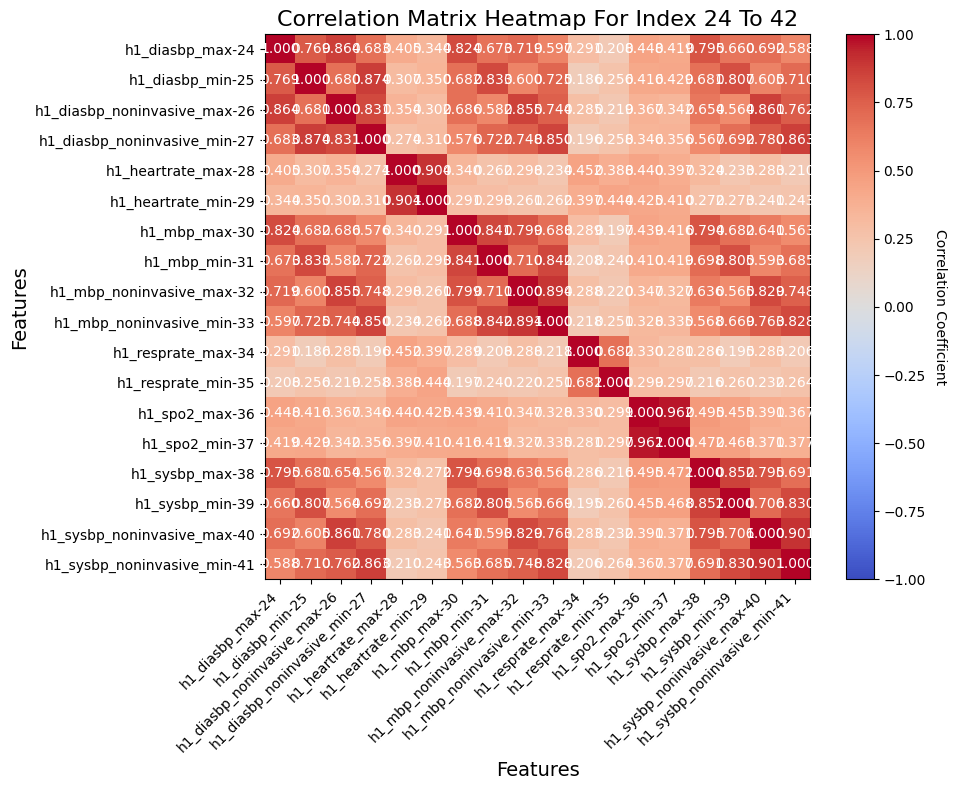

In [9]:
# Calculating Correlation Matrix For Feature Reduction

correlation_matrix = [[0] * len(labels) for _ in range(len(labels))]

for i in range(len(labels)):
    for j in range(len(labels)):
        num = 0  
        for k in range(len(normalized_data_points)):
            num += (float(normalized_data_points[k][i])-attribute_mean[i])*(float(normalized_data_points[k][j])-attribute_mean[j])
        num=num/len(normalized_data_points)

        std_dev_i = attribute_stddev[i]
        std_dev_j = attribute_stddev[j]

        if std_dev_i==0 or std_dev_j==0:
            correlation_matrix[i][j]=0
        else:
            correlation_matrix[i][j]=num/(std_dev_i*std_dev_j)

start_index = labels.index('h1_diasbp_max')
end_index = labels.index('h1_sysbp_noninvasive_min') + 1  
result_index=len(labels)-1

print("Correlation Matrix For Index",start_index,"To",end_index)
print("")

header = ["Index"+" "*24] + [f"{j}" for j in range(start_index, start_index)]
print("\t".join(header))

for i in range(start_index, end_index):
    row = [f"{labels[i]:<24}"] + [f"{correlation_matrix[i][j]:<.3f}" for j in range(start_index, end_index)]
    print("\t".join(row))

print()
result_row = [f"{labels[result_index]:<24}"] + [f"{correlation_matrix[result_index][j]:<.3f}" for j in range(start_index, end_index)]
print("\t".join(result_row))




sub_correlation_matrix = []
for i in range(start_index, end_index):
    row = []
    for j in range(start_index, end_index):
        row.append(correlation_matrix[i][j])
    sub_correlation_matrix.append(row)

sub_correlation_matrix = np.array(sub_correlation_matrix)  

plt.figure(figsize=(10, 8))
cax = plt.imshow(sub_correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
cbar = plt.colorbar(cax)
cbar.set_label('Correlation Coefficient', rotation=270, labelpad=15)

ticks = range(end_index - start_index)  
plt.xticks(ticks=ticks, labels=[f"{labels[i]}-{i}" for i in range(start_index, end_index)], rotation=45, ha='right')
plt.yticks(ticks=ticks, labels=[f"{labels[i]}-{i}" for i in range(start_index, end_index)])

for i in range(len(sub_correlation_matrix)):
    for j in range(len(sub_correlation_matrix)):
        plt.text(j, i, f"{sub_correlation_matrix[i, j]:.3f}", ha='center', va='center', 
                 color='black' if sub_correlation_matrix[i, j] < 0 else 'white')

plt.title("Correlation Matrix Heatmap For Index "+str(start_index)+" To "+str(end_index), fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Features", fontsize=14)

plt.tight_layout()
plt.show()


In [10]:
avoid_indexes_correlation=[]

print("label_1"," "*(25-len("label_1")),",","label_2"," "*(25-len("label_2")),"-","Correlation")
i_cov = start_index
while(i_cov<end_index):
    print(labels[i_cov]," "*(25-len(labels[i_cov])),",",labels[i_cov+1]," "*(25-len(labels[i_cov+1])),"-",correlation_matrix[i_cov][i_cov+1])
    index_cov=i_cov
    result_corr_1=correlation_matrix[i_cov][result_index]
    result_corr_2=correlation_matrix[i_cov+1][result_index]
    if(result_corr_1<0):
        result_corr_1=-result_corr_1
    if(result_corr_2<0):
        result_corr_2=-result_corr_2
    if(result_corr_1>result_corr_2):
        index_cov=i_cov+1
    avoid_indexes_correlation.append(index_cov)
    i_cov=i_cov+2

print()
print("Avoid Indexes - ")
for i in avoid_indexes_correlation:
    print("index",i,labels[i])

"""

# Data preparation
x_labels = [labels[i_cov] for i_cov in range(start_index, end_index, 2)]
y_labels = [labels[i_cov + 1] for i_cov in range(start_index, end_index, 2)]
correlation_values = [correlation_matrix[i_cov][i_cov + 1] for i_cov in range(start_index, end_index, 2)]
avoid_indexes = set(avoid_indexes_correlation)

# Create scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(x_labels, correlation_values, color='blue', label='Correlation Values')

# Highlight avoided indexes
for index in avoid_indexes:
    plt.scatter(labels[index], correlation_matrix[index][result_index], color='red', s=100, label=f'Avoided: {labels[index]}')

plt.title("Correlation Values Between Pairs of Labels")
plt.xlabel("Labels")
plt.ylabel("Correlation")
plt.axhline(0, color='grey', lw=0.5, ls='--')  # Add a horizontal line at y=0
plt.xticks(rotation=45)
plt.grid()
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

"""

label_1                    , label_2                    - Correlation
h1_diasbp_max              , h1_diasbp_min              - 0.768682781413716
h1_diasbp_noninvasive_max  , h1_diasbp_noninvasive_min  - 0.8306663733671048
h1_heartrate_max           , h1_heartrate_min           - 0.9036780031938925
h1_mbp_max                 , h1_mbp_min                 - 0.8411251190046822
h1_mbp_noninvasive_max     , h1_mbp_noninvasive_min     - 0.8944193410691319
h1_resprate_max            , h1_resprate_min            - 0.682222874628266
h1_spo2_max                , h1_spo2_min                - 0.9624579167464877
h1_sysbp_max               , h1_sysbp_min               - 0.8522238888761562
h1_sysbp_noninvasive_max   , h1_sysbp_noninvasive_min   - 0.90097028418813

Avoid Indexes - 
index 24 h1_diasbp_max
index 26 h1_diasbp_noninvasive_max
index 29 h1_heartrate_min
index 30 h1_mbp_max
index 32 h1_mbp_noninvasive_max
index 35 h1_resprate_min
index 36 h1_spo2_max
index 38 h1_sysbp_max
index 40 h1_sysbp_n

'\n\n# Data preparation\nx_labels = [labels[i_cov] for i_cov in range(start_index, end_index, 2)]\ny_labels = [labels[i_cov + 1] for i_cov in range(start_index, end_index, 2)]\ncorrelation_values = [correlation_matrix[i_cov][i_cov + 1] for i_cov in range(start_index, end_index, 2)]\navoid_indexes = set(avoid_indexes_correlation)\n\n# Create scatter plot\nplt.figure(figsize=(12, 6))\nplt.scatter(x_labels, correlation_values, color=\'blue\', label=\'Correlation Values\')\n\n# Highlight avoided indexes\nfor index in avoid_indexes:\n    plt.scatter(labels[index], correlation_matrix[index][result_index], color=\'red\', s=100, label=f\'Avoided: {labels[index]}\')\n\nplt.title("Correlation Values Between Pairs of Labels")\nplt.xlabel("Labels")\nplt.ylabel("Correlation")\nplt.axhline(0, color=\'grey\', lw=0.5, ls=\'--\')  # Add a horizontal line at y=0\nplt.xticks(rotation=45)\nplt.grid()\nplt.legend(loc=\'upper right\')\nplt.tight_layout()\nplt.show()\n\n'

In [11]:
avoid_indexes=avoid_indexes_initial + avoid_indexes_variance + avoid_indexes_correlation

data_array = np.array(normalized_data_points)

unique_rows, counts = np.unique(data_array, axis=0, return_counts=True)
duplicates = unique_rows[counts > 1]

if duplicates.size > 0:
    print("Duplicate rows found:")
    print(duplicates)
else:
    print("No duplicates found.")

X = data_array[:, :-1]  
y = data_array[:, -1] 

X = np.delete(X, avoid_indexes, axis=1)

train_stop = int(len(data_array) * 0.7)        
validation_stop = int(len(data_array) * 0.85)   
test_stop = len(data_array)  

X_train = X[:train_stop]
y_train = y[:train_stop]

X_val = X[train_stop:validation_stop]
y_val = y[train_stop:validation_stop]

X_test = X[validation_stop:test_stop]
y_test = y[validation_stop:test_stop]

model_names=[]
model_accuracies=[]
model_precision=[]
model_recall=[]
model_log_loss=[]


No duplicates found.


Final Train Accuracy: 0.7636
Final Validation Accuracy: 0.7791
Final Train Loss: 0.5162
Final Validation Loss: 0.4959
Final Train Precision: 0.8907
Final Validation Precision: 0.9009
Final Train Recall: 0.7636
Final Validation Recall: 0.7791


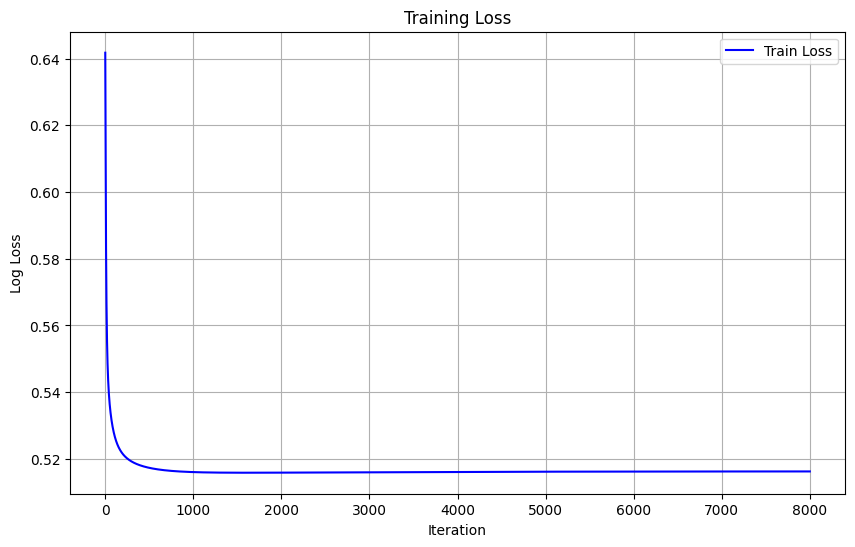

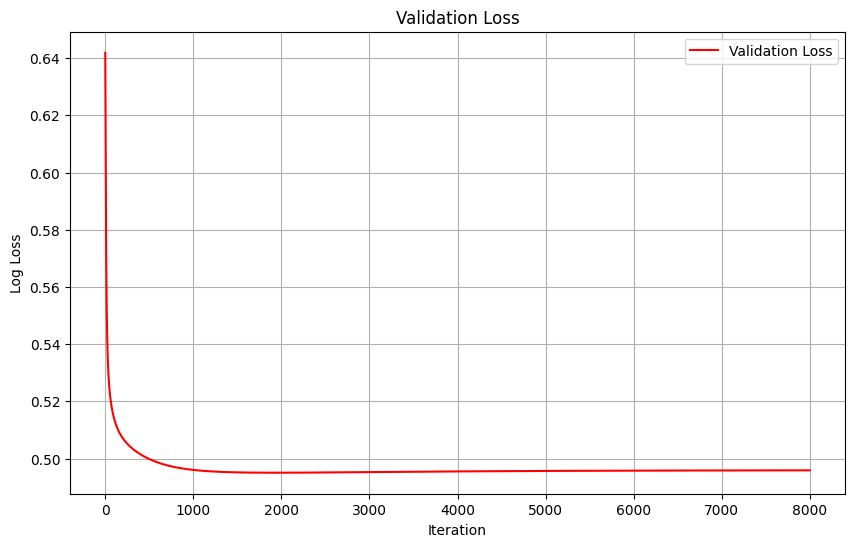

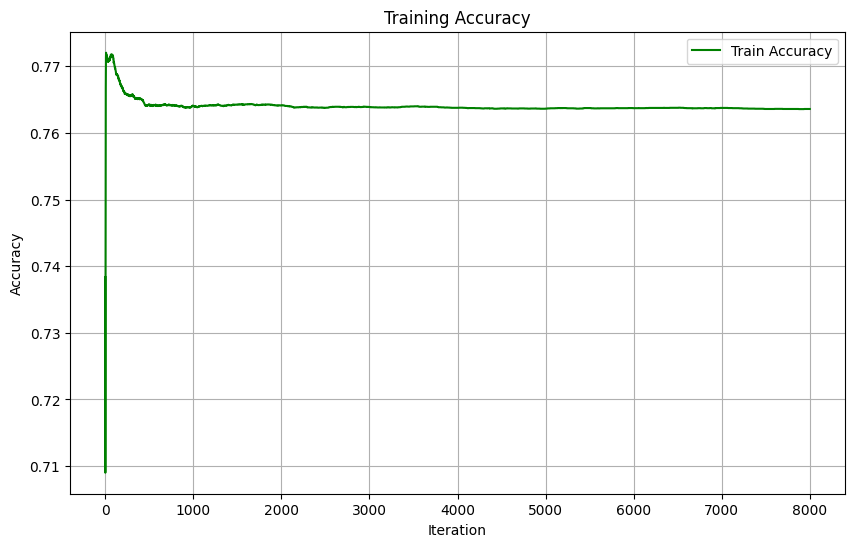

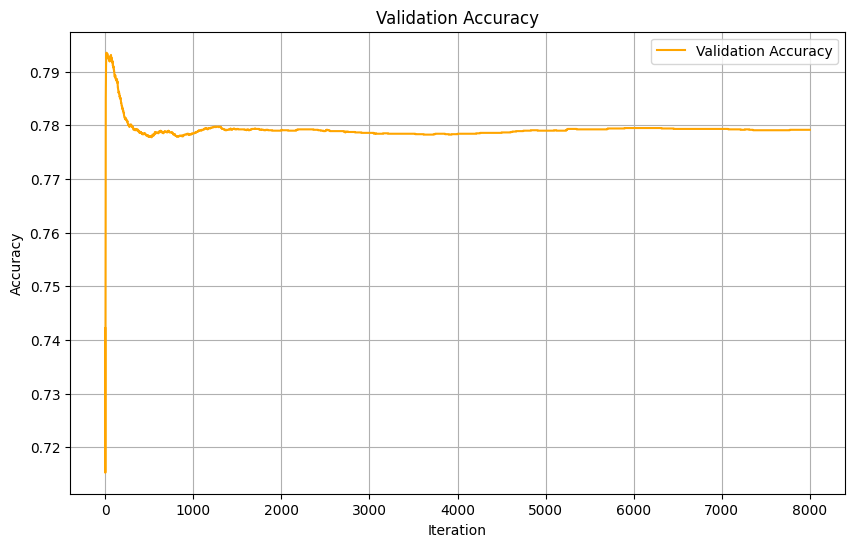

In [12]:
# Logistic Regression

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: w for i, w in enumerate(class_weights)}


sgd_lr = SGDClassifier(
    loss='log_loss',         
    max_iter=8000,           
    random_state=0,        
    learning_rate='constant',  
    eta0=0.00001                
)

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for i in range(1,8001):
    sample_weights = np.array([class_weights_dict[label] for label in y_train])
    
    sgd_lr.partial_fit(X_train, y_train, classes=np.unique(y_train), sample_weight=sample_weights)

    y_train_prob = sgd_lr.predict_proba(X_train)
    y_val_prob = sgd_lr.predict_proba(X_val)

    train_loss = log_loss(y_train, y_train_prob)
    val_loss = log_loss(y_val, y_val_prob)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    y_train_pred = sgd_lr.predict(X_train)
    y_val_pred = sgd_lr.predict(X_val)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)

    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

print(f"Final Train Accuracy: {train_accuracies[-1]:.4f}")
print(f"Final Validation Accuracy: {val_accuracies[-1]:.4f}")
print(f"Final Train Loss: {train_losses[-1]:.4f}")
print(f"Final Validation Loss: {val_losses[-1]:.4f}")


train_precision = precision_score(y_train, y_train_pred, average='weighted')
val_precision = precision_score(y_val, y_val_pred, average='weighted')

train_recall = recall_score(y_train, y_train_pred, average='weighted')
val_recall = recall_score(y_val, y_val_pred, average='weighted')

print(f"Final Train Precision: {train_precision:.4f}")
print(f"Final Validation Precision: {val_precision:.4f}")
print(f"Final Train Recall: {train_recall:.4f}")
print(f"Final Validation Recall: {val_recall:.4f}")


model_names.append("Logistic Regression")
model_accuracies.append(val_accuracies[-1])
model_precision.append(val_precision)
model_recall.append(val_recall)
model_log_loss.append(val_losses[-1])

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Train Loss', color='blue')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Training Loss')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(val_losses, label='Validation Loss', color='red')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Validation Loss')
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(train_accuracies, label='Train Accuracy', color='green')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(val_accuracies, label='Validation Accuracy', color='orange')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

In [13]:
# Random Forest Classification

rf = RandomForestClassifier(
    n_estimators=1000,          
    max_features=20,         
    max_depth=None,            
    min_samples_split=2,         
    min_samples_leaf=1,       
    bootstrap=True,              
    random_state=42,
    class_weight='balanced'             
)
rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_features=20,
                       n_estimators=1000, random_state=42)

Feature :  ventilated                  , Importance :  0.08684736754278766
Feature :  diagnosis_3j                , Importance :  0.06448755693873284
Feature :  age                         , Importance :  0.05398481724329167
Feature :  gcs_motor                   , Importance :  0.053379453516039385
Feature :  map                         , Importance :  0.0533604359332778
Feature :  heart_rate                  , Importance :  0.04858069883473097
Feature :  resprate                    , Importance :  0.04392499616576597
Feature :  temp                        , Importance :  0.04359200476832401
Feature :  h1_resprate_max             , Importance :  0.037789171833567864
Feature :  h1_heartrate_max            , Importance :  0.03747015109482404
Feature :  gcs_verbal                  , Importance :  0.03734118121646683
Feature :  diagnosis_2                 , Importance :  0.037267840154745636
Feature :  bmi                         , Importance :  0.03711794139069773
Feature :  h1_sysbp_min

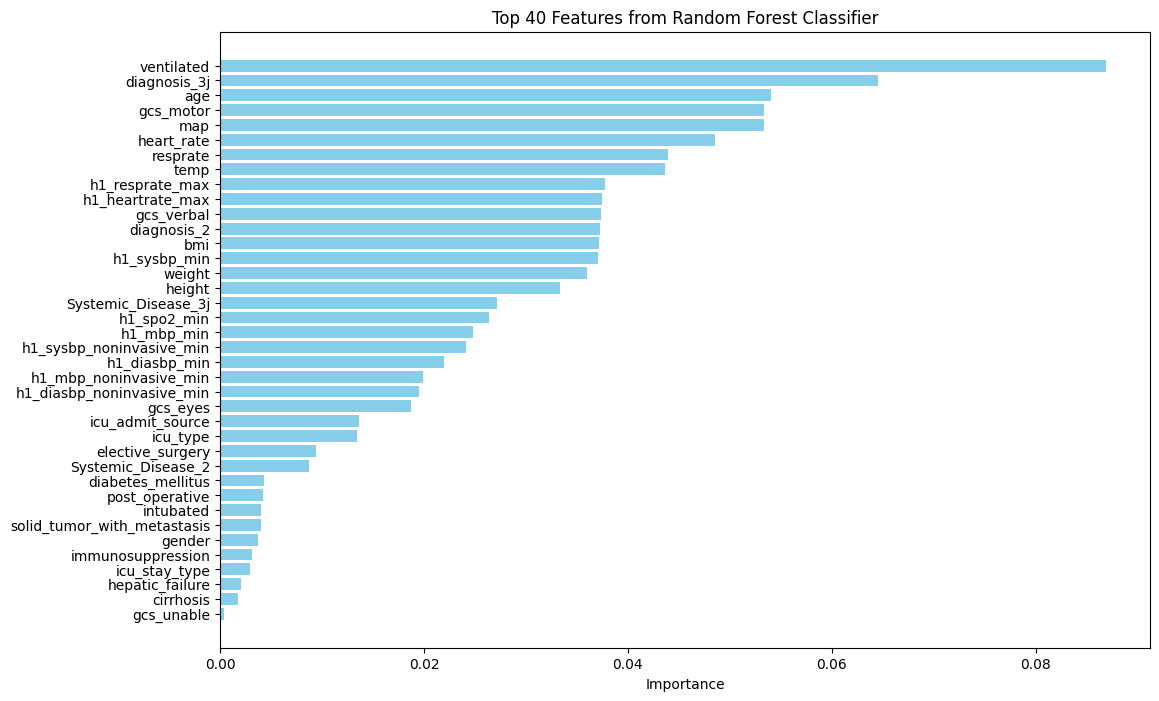

In [14]:
# Best Feature Extraction From Random Forest Classifier

updated_labels=[]
for i in range(0,len(labels)):
    if i not in avoid_indexes:
        updated_labels.append(labels[i])

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]


feature_importance_list = []

for i in indices:
    feature_importance_list.append((updated_labels[i], importances[i]))

top_40_features = feature_importance_list[:40]

for feature, importance in top_40_features:
    print("Feature : ",feature," "*(26-len(feature)),",","Importance : ",importance)

top_features, top_importances = zip(*top_40_features)

plt.figure(figsize=(12, 8))
plt.barh(top_features, top_importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Top 40 Features from Random Forest Classifier')
plt.gca().invert_yaxis()  
plt.show()


In [15]:

y_train_pred = rf.predict(X_train)
y_val_pred = rf.predict(X_val)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

train_precision = precision_score(y_train, y_train_pred, average='weighted')
val_precision = precision_score(y_val, y_val_pred, average='weighted')

train_recall = recall_score(y_train, y_train_pred, average='weighted')
val_recall = recall_score(y_val, y_val_pred, average='weighted')



In [16]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)

class_weights_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}
sample_weights = np.array([class_weights_dict[label] for label in y_train])


nb_model = GaussianNB(
    priors=None,
    var_smoothing=1e-9
)
nb_model.fit(X_train, y_train, sample_weight=sample_weights)

y_train_pred_nb = nb_model.predict(X_train)
y_val_pred_nb = nb_model.predict(X_val)

train_accuracy_nb = accuracy_score(y_train, y_train_pred_nb)
val_accuracy_nb = accuracy_score(y_val, y_val_pred_nb)

train_precision_nb = precision_score(y_train, y_train_pred_nb, average='weighted')
val_precision_nb = precision_score(y_val, y_val_pred_nb, average='weighted')

train_recall_nb = recall_score(y_train, y_train_pred_nb, average='weighted')
val_recall_nb = recall_score(y_val, y_val_pred_nb, average='weighted')

y_train_prob_nb = nb_model.predict_proba(X_train)
y_val_prob_nb = nb_model.predict_proba(X_val)

train_log_loss_nb = log_loss(y_train, y_train_prob_nb)
val_log_loss_nb = log_loss(y_val, y_val_prob_nb)

model_names.append("Naive Bayes")
model_accuracies.append(val_accuracy_nb)
model_precision.append(val_precision_nb)
model_recall.append(val_recall_nb)
model_log_loss.append(val_log_loss_nb)


print(f"Validation Accuracy: {val_accuracy_nb:.4f}")
print(f"Validation Precision: {val_precision_nb:.4f}")
print(f"Validation Recall: {val_recall_nb:.4f}")
print(f"Validation Log Loss: {val_log_loss_nb:.4f}")

Validation Accuracy: 0.8018
Validation Precision: 0.8927
Validation Recall: 0.8018
Validation Log Loss: 1.2697


In [17]:
dt_model = DecisionTreeClassifier(
    random_state=42,      
    class_weight='balanced'  ,
    criterion='gini',
    max_depth=None
)
dt_model.fit(X_train, y_train)

y_train_pred_dt = dt_model.predict(X_train)
y_val_pred_dt = dt_model.predict(X_val)

train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)
val_accuracy_dt = accuracy_score(y_val, y_val_pred_dt)

train_precision_dt = precision_score(y_train, y_train_pred_dt, average='weighted')
val_precision_dt = precision_score(y_val, y_val_pred_dt, average='weighted')

train_recall_dt = recall_score(y_train, y_train_pred_dt, average='weighted')
val_recall_dt = recall_score(y_val, y_val_pred_dt, average='weighted')

y_train_prob_dt = dt_model.predict_proba(X_train)
y_val_prob_dt = dt_model.predict_proba(X_val)

train_log_loss_dt = log_loss(y_train, y_train_prob_dt)
val_log_loss_dt = log_loss(y_val, y_val_prob_dt)

model_names.append("Decision Tree")
model_accuracies.append(val_accuracy_dt)
model_precision.append(val_precision_dt)
model_recall.append(val_recall_dt)
model_log_loss.append(val_log_loss_dt)

print(f"Validation Accuracy: {val_accuracy_dt:.4f}")
print(f"Validation Precision: {val_precision_dt:.4f}")
print(f"Validation Recall: {val_recall_dt:.4f}")
print(f"Validation Log Loss: {val_log_loss_dt:.4f}")

Validation Accuracy: 0.8722
Validation Precision: 0.8727
Validation Recall: 0.8722
Validation Log Loss: 4.6051


In [18]:

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)

svm_model = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    probability=True, 
    class_weight='balanced', 
    random_state=42)

svm_model.fit(X_train, y_train)

y_train_pred_svm = svm_model.predict(X_train)
y_val_pred_svm = svm_model.predict(X_val)

train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
val_accuracy_svm = accuracy_score(y_val, y_val_pred_svm)

train_precision_svm = precision_score(y_train, y_train_pred_svm, average='weighted')
val_precision_svm = precision_score(y_val, y_val_pred_svm, average='weighted')

train_recall_svm = recall_score(y_train, y_train_pred_svm, average='weighted')
val_recall_svm = recall_score(y_val, y_val_pred_svm, average='weighted')

y_train_prob_svm = svm_model.predict_proba(X_train)
y_val_prob_svm = svm_model.predict_proba(X_val)

train_log_loss_svm = log_loss(y_train, y_train_prob_svm)
val_log_loss_svm = log_loss(y_val, y_val_prob_svm)

model_names.append("SVM")
model_accuracies.append(val_accuracy_svm)
model_precision.append(val_precision_svm)
model_recall.append(val_recall_svm)
model_log_loss.append(val_log_loss_svm)

print(f"Validation Accuracy: {val_accuracy_svm:.4f}")
print(f"Validation Precision: {val_precision_svm:.4f}")
print(f"Validation Recall: {val_recall_svm:.4f}")
print(f"Validation Log Loss: {val_log_loss_svm:.4f}")


Validation Accuracy: 0.7585
Validation Precision: 0.9058
Validation Recall: 0.7585
Validation Log Loss: 0.2285


In [19]:


perceptron_model = Perceptron(
    random_state=42, 
    class_weight='balanced',
    max_iter=1000
    )
perceptron_model.fit(X_train, y_train)

y_train_pred_perceptron = perceptron_model.predict(X_train)
y_val_pred_perceptron = perceptron_model.predict(X_val)

train_accuracy_perceptron=accuracy_score(y_train, y_train_pred_perceptron)
val_accuracy_perceptron=accuracy_score(y_val, y_val_pred_perceptron)

train_precision_perceptron=precision_score(y_train, y_train_pred_perceptron, average='weighted')
val_precision_perceptron=precision_score(y_val, y_val_pred_perceptron, average='weighted')

train_recall_perceptron=recall_score(y_train, y_train_pred_perceptron, average='weighted')
val_recall_perceptron=recall_score(y_val, y_val_pred_perceptron, average='weighted')

model_names.append("Perceptron")
model_accuracies.append(val_accuracy_perceptron)
model_precision.append(val_precision_perceptron)
model_recall.append(val_recall_perceptron)

print(f"Validation Accuracy: {val_accuracy_perceptron:.4f}")
print(f"Validation Precision: {val_precision_perceptron:.4f}")
print(f"Validation Recall: {val_recall_perceptron:.4f}")



Validation Accuracy: 0.8966
Validation Precision: 0.8841
Validation Recall: 0.8966


In [20]:

rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

y_train_pred_rf = rf_model.predict(X_train)
y_val_pred_rf = rf_model.predict(X_val)

train_accuracy_rf=accuracy_score(y_train, y_train_pred_rf)
val_accuracy_rf=accuracy_score(y_val, y_val_pred_rf)

train_precision_rf=precision_score(y_train, y_train_pred_rf, average='weighted')
val_precision_rf=precision_score(y_val, y_val_pred_rf, average='weighted')

train_recall_rf=recall_score(y_train, y_train_pred_rf, average='weighted')
val_recall_rf=recall_score(y_val, y_val_pred_rf, average='weighted')

model_names.append("Random Forest")
model_accuracies.append(val_accuracy_rf)
model_precision.append(val_precision_rf)
model_recall.append(val_recall_rf)

print(f"Validation Accuracy: {val_accuracy_rf:.4f}")
print(f"Validation Precision: {val_precision_rf:.4f}")
print(f"Validation Recall: {val_recall_rf:.4f}")


Validation Accuracy: 0.9209
Validation Precision: 0.9063
Validation Recall: 0.9209


In [21]:

mlp_model = MLPClassifier(
    random_state=42, 
    max_iter=500,
    activation='relu',
    solver='adam',
    alpha=0.0001
    )

mlp_model.fit(X_train, y_train)

y_train_pred_mlp = mlp_model.predict(X_train)
y_val_pred_mlp = mlp_model.predict(X_val)

train_accuracy_mlp=accuracy_score(y_train, y_train_pred_mlp)
val_accuracy_mlp=accuracy_score(y_val, y_val_pred_mlp)

train_precision_mlp=precision_score(y_train, y_train_pred_mlp, average='weighted')
val_precision_mlp=precision_score(y_val, y_val_pred_mlp, average='weighted')

train_recall_mlp=recall_score(y_train, y_train_pred_mlp, average='weighted')
val_recall_mlp=recall_score(y_val, y_val_pred_mlp, average='weighted')

model_names.append("MLP")
model_accuracies.append(val_accuracy_mlp)
model_precision.append(val_precision_mlp)
model_recall.append(val_recall_mlp)

print(f"Validation Accuracy: {val_accuracy_mlp:.4f}")
print(f"Validation Precision: {val_precision_mlp:.4f}")
print(f"Validation Recall: {val_recall_mlp:.4f}")


Validation Accuracy: 0.9175
Validation Precision: 0.8968
Validation Recall: 0.9175


[0.7791466101003508, 0.8018275271273558, 0.8722362731500367, 0.7585053438851269, 0.8966304968589377, 0.9208615485028963, 0.9175165211715754]
['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'SVM', 'Perceptron', 'Random Forest', 'MLP']


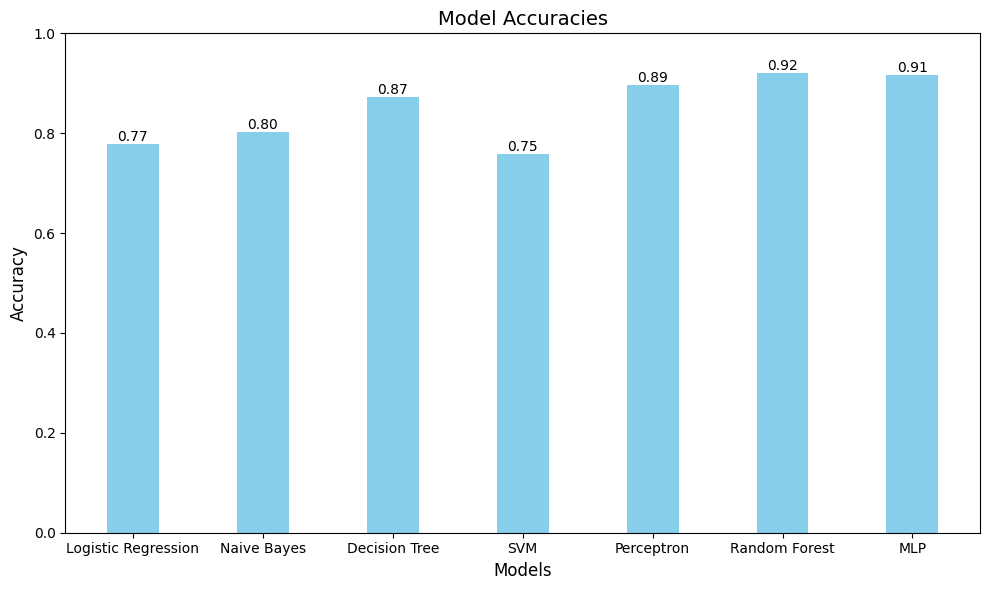

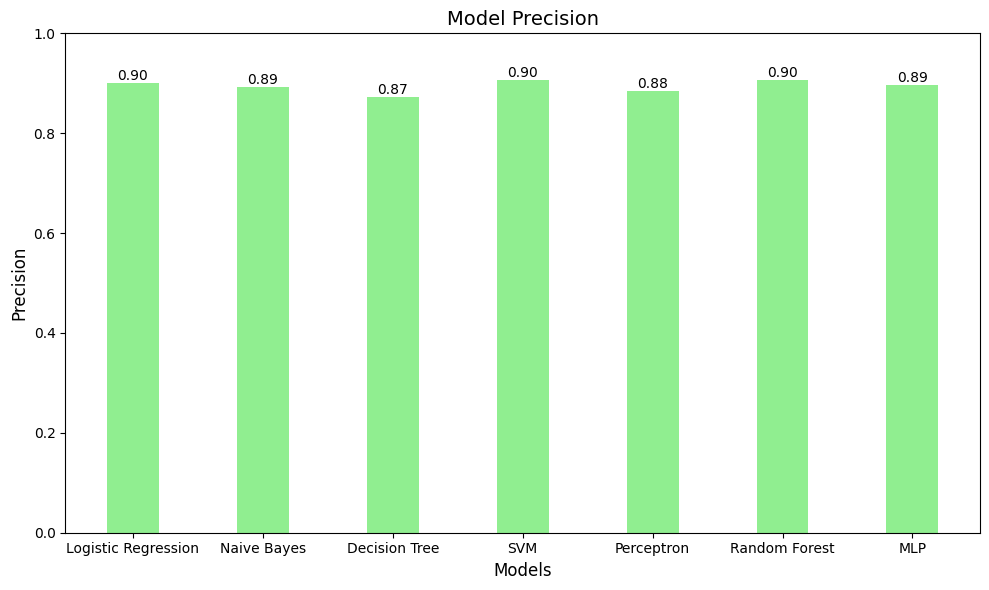

In [22]:
print(model_accuracies)
print(model_names)

# Accuracy Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, model_accuracies, color='skyblue', width=0.4)
plt.title('Model Accuracies', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0,1)
for bar in bars:
    height = bar.get_height()
    truncated_value = np.floor(height * 100) / 100
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{truncated_value:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, model_precision, color='lightgreen', width=0.4)
plt.title('Model Precision', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.ylim(0, 1)
for bar in bars:
    height = bar.get_height()
    truncated_value = np.floor(height * 100) / 100
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{truncated_value:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()


In [23]:
param_grid = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'class_weight': ['balanced', None]
}

rf_model = RandomForestClassifier(random_state=42,n_jobs=-1)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy',n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_

y_train_pred_rf = best_rf_model.predict(X_train)
y_val_pred_rf = best_rf_model.predict(X_val)

train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
val_accuracy_rf = accuracy_score(y_val, y_val_pred_rf)

train_precision_rf = precision_score(y_train, y_train_pred_rf, average='weighted')
val_precision_rf = precision_score(y_val, y_val_pred_rf, average='weighted')

train_recall_rf = recall_score(y_train, y_train_pred_rf, average='weighted')
val_recall_rf = recall_score(y_val, y_val_pred_rf, average='weighted')

model_names.append("Random Forest")
model_accuracies.append(val_accuracy_rf)
model_precision.append(val_precision_rf)
model_recall.append(val_recall_rf)

print(f"Validation Accuracy: {val_accuracy_rf:.4f}")
print(f"Validation Precision: {val_precision_rf:.4f}")
print(f"Validation Recall: {val_recall_rf:.4f}")

print("Best Parameters for the Random Forest model:")
print(grid_search.best_params_)


Validation Accuracy: 0.9228
Validation Precision: 0.9085
Validation Recall: 0.9228
Best Parameters for the Random Forest model:
{'class_weight': None, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [24]:
best_params = {
    'class_weight': None, 
    'max_depth': None, 
    'min_samples_leaf': 1, 
    'min_samples_split': 5, 
    'n_estimators': 200
}

rf_model = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)

cv_scores_accuracy = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
cv_scores_precision = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='precision_weighted')
cv_scores_recall = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='recall_weighted')

print("K-Fold Validation Accuracy Scores: ", cv_scores_accuracy)
print("K-Fold Validation Precision Scores: ", cv_scores_precision)
print("K-Fold Validation Recall Scores: ", cv_scores_recall)
print()

mean_accuracy = cv_scores_accuracy.mean()
mean_precision = cv_scores_precision.mean()
mean_recall = cv_scores_recall.mean()

print(f"Average k-Fold Validation Accuracy: {mean_accuracy:.4f}")
print(f"Average k-Fold Validation Precision: {mean_precision:.4f}")
print(f"Average k-Fold Validation Recall: {mean_recall:.4f}")
print()




K-Fold Validation Accuracy Scores:  [0.9104021  0.91188811 0.91022727 0.90734266 0.91319171]
K-Fold Validation Precision Scores:  [0.89482822 0.89803983 0.89338072 0.88791653 0.9013042 ]
K-Fold Validation Recall Scores:  [0.9104021  0.91188811 0.91022727 0.90734266 0.91319171]

Average k-Fold Validation Accuracy: 0.9106
Average k-Fold Validation Precision: 0.8951
Average k-Fold Validation Recall: 0.9106



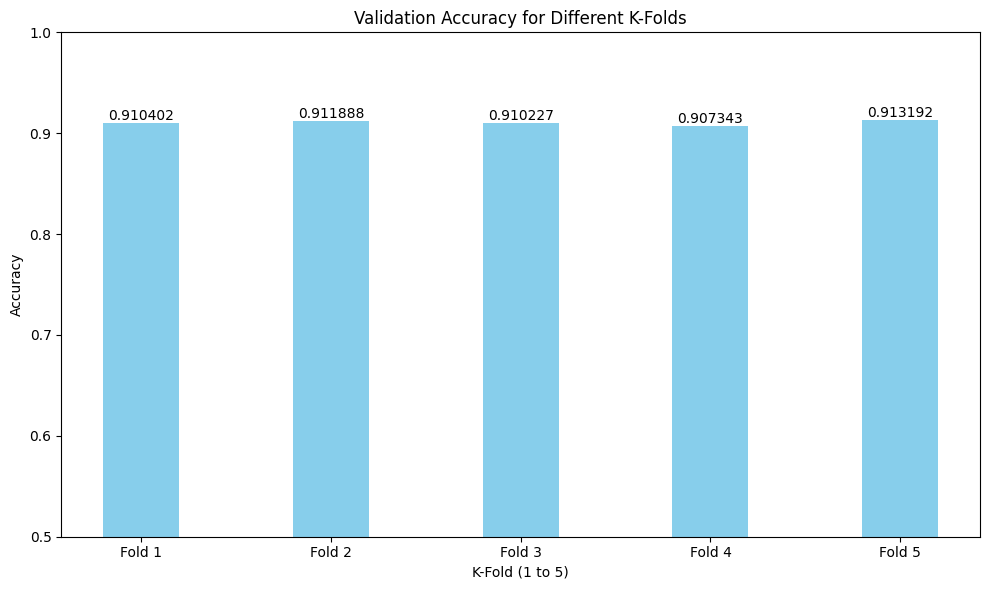

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(range(1, 6), cv_scores_accuracy,color='skyblue', align='center', width=0.4)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.6f}', ha='center', va='bottom')

ax.set_xlabel('K-Fold (1 to 5)')
ax.set_ylabel('Accuracy')
ax.set_title('Validation Accuracy for Different K-Folds')
ax.set_xticks(range(1, 6))
ax.set_xticklabels([f'Fold {i}' for i in range(1, 6)])

plt.ylim(0.5, 1)

plt.tight_layout()
plt.show()

In [26]:

rf_model = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)

rf_model.fit(X_train, y_train)

y_train_pred_rf = rf_model.predict(X_train)
y_val_pred_rf = rf_model.predict(X_val)

train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
val_accuracy_rf = accuracy_score(y_val, y_val_pred_rf)

train_precision_rf = precision_score(y_train, y_train_pred_rf, average='weighted')
val_precision_rf = precision_score(y_val, y_val_pred_rf, average='weighted')

train_recall_rf = recall_score(y_train, y_train_pred_rf, average='weighted')
val_recall_rf = recall_score(y_val, y_val_pred_rf, average='weighted')


print(f"Validation Accuracy: {val_accuracy_rf:.4f}")
print(f"Validation Precision: {val_precision_rf:.4f}")
print(f"Validation Recall: {val_recall_rf:.4f}")



Validation Accuracy: 0.9228
Validation Precision: 0.9085
Validation Recall: 0.9228


In [27]:
with open('final_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

print("Model saved as 'final_model.pkl'")


Model saved as 'final_model.pkl'


In [28]:
with open('final_model.pkl', 'rb') as f:
    loaded_rf_model = pickle.load(f)
print("Model loaded successfully.")

y_pred_rf = loaded_rf_model.predict(X_test)

test_accuracy_rf = accuracy_score(y_test, y_pred_rf)
test_precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
test_recall_rf = recall_score(y_test, y_pred_rf, average='weighted')

print(f"Test Accuracy: {test_accuracy_rf:.4f}")
print(f"Test Precision: {test_precision_rf:.4f}")
print(f"Test Recall: {test_recall_rf:.4f}")

Model loaded successfully.
Test Accuracy: 0.9188
Test Precision: 0.8992
Test Recall: 0.9188
